<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Web_Scraping_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/web-scraping-using-python

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [16]:
url = "https://web.archive.org/web/20170605172849/https://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [17]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [18]:
# Get the title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [19]:
# Print out the text
text = soup.get_text()
print(soup.text)

















2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results

























19 captures
05 Jun 2017 - 29 May 2023















May
JUN
Jul




05




2016
2017
2018







success
fail






















 About this capture






COLLECTED BY



		Organization: Alexa Crawls


	  Starting in 1996, Alexa Internet has been donating their crawl data to the Internet Archive.  Flowing in every day, these data are added to the Wayback Machine after an embargo period.
	



Collection: Alexa Crawls


	  Starting in 1996, Alexa Internet has been donating their crawl data to the Internet Archive.  Flowing in every day, these data are added to the Wayback Machine after an embargo period.
	




TIMESTAMPS





The Wayback Machine - https://web.archive.org/web/20170605172849/http://www.hubertiming.com:80/results/2017GPTR10K










5K
10K




 2017 Intel Great Place to Run 10K \ Urban Clash Games
 Hillsboro Stadium, Hillsboro, OR
 June 2nd, 2017

              

Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells.

In [20]:
soup.find_all('a')

[<a href="/web/" title="Wayback Machine home page"><img alt="Wayback Machine" border="0" src="/_static/images/toolbar/wayback-toolbar-logo-200.png" srcset="/_static/images/toolbar/wayback-toolbar-logo-100.png, /_static/images/toolbar/wayback-toolbar-logo-150.png 1.5x, /_static/images/toolbar/wayback-toolbar-logo-200.png 2x" style="width:100px"/></a>,
 <a class="t" href="/web/20170605172849*/https://www.hubertiming.com/results/2017GPTR10K" title="See a list of every capture for this URL">19 captures</a>,
 <a href="" id="wm-graph-anchor">
 <div id="wm-ipp-sparkline" style="position: relative" title="Explore captures for this URL">
 <canvas border="0" height="27" id="wm-sparkline-canvas" width="725"></canvas>
 </div>
 </a>,
 <a href="https://web.archive.org/web/20170707053241/http://www.hubertiming.com:80/results/2017GPTR10K" title="07 Jul 2017"><strong>Jul</strong></a>,
 <a href="https://web.archive.org/web/20170707053241/http://www.hubertiming.com:80/results/2017GPTR10K" title="05:32:41

In [21]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

/web/
/web/20170605172849*/https://www.hubertiming.com/results/2017GPTR10K

https://web.archive.org/web/20170707053241/http://www.hubertiming.com:80/results/2017GPTR10K
https://web.archive.org/web/20170707053241/http://www.hubertiming.com:80/results/2017GPTR10K
https://web.archive.org/web/20180815211939/http://www.hubertiming.com:80/results/2017GPTR10K
#
https://archive.org/account/login.php
http://faq.web.archive.org/
#close
/web/20170605172849/http://web.archive.org/screenshot/https://www.hubertiming.com/results/2017GPTR10K
#
#
#
#expand
https://archive.org/details/alexacrawls
http://www.alexa.com/
http://web.archive.org/
https://archive.org/details/alexacrawls
http://www.alexa.com/
http://web.archive.org/
/web/20170605172849/https://www.hubertiming.com/results/2017GPTR
https://web.archive.org/web/20170605172849/http://hubertiming.com/
#individual
#team
https://web.archive.org/web/20170605172849/mailto:timing@hubertiming.com
#tabs-1
None
None
https://web.archive.org/web/2017060517284

In [22]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr class="m">
<td class="b" nowrap="nowrap">May</td>
<td class="c" id="displayMonthEl" title="You are here: 17:28:49 Jun 05, 2017">JUN</td>
<td class="f" nowrap="nowrap"><a href="https://web.archive.org/web/20170707053241/http://www.hubertiming.com:80/results/2017GPTR10K" title="07 Jul 2017"><strong>Jul</strong></a></td>
</tr>, <tr class="d">
<td class="b" nowrap="nowrap"><img alt="Previous capture" border="0" height="16" src="/_static/images/toolbar/wm_tb_prv_off.png" width="14"/></td>
<td class="c" id="displayDayEl" style="width:34px;font-size:22px;white-space:nowrap;" title="You are here: 17:28:49 Jun 05, 2017">05</td>
<td class="f" nowrap="nowrap"><a href="https://web.archive.org/web/20170707053241/http://www.hubertiming.com:80/results/2017GPTR10K" title="05:32:41 Jul 07, 2017"><img alt="Next capture" border="0" height="16" src="/_static/images/toolbar/wm_tb_nxt_on.png" width="14"/></a></td>
</tr>, <tr class="y">
<td class="b" nowrap="nowrap">2016</td>
<td class="c" id="displayYe

In [23]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

In [24]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [26]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [27]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[May, JUN, Jul]"
1,"[, 05, ]"
2,"[2016, 2017, 2018]"
3,"[Finishers:, 577]"
4,"[Male:, 414]"
5,"[Female:, 163]"
6,[]
7,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
8,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
9,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."


In [28]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[May,JUN,Jul],None,None,None,None,None,None,None,None,None,None,None
1,[,05,],None,None,None,None,None,None,None,None,None,None,None
2,[2016,2017,2018],None,None,None,None,None,None,None,None,None,None,None
3,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
4,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
5,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
6,[],None,None,None,None,None,None,None,None,None,None,None,None,None
7,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
8,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
9,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]


In [29]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,May,JUN,Jul],None,None,None,None,None,None,None,None,None,None,None
1,,05,],None,None,None,None,None,None,None,None,None,None,None
2,2016,2017,2018],None,None,None,None,None,None,None,None,None,None,None
3,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
4,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
5,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
6,],None,None,None,None,None,None,None,None,None,None,None,None,None
7,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
8,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
9,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]


In [30]:
col_labels = soup.find_all('th')

In [31]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [32]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [33]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [34]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,May,JUN,Jul],None,None,None,None,None,None,None,None,None,None,None
1,,05,],None,None,None,None,None,None,None,None,None,None,None
2,2016,2017,2018],None,None,None,None,None,None,None,None,None,None,None
3,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
4,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
5,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
6,],None,None,None,None,None,None,None,None,None,None,None,None,None
7,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
8,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]


In [35]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,May,JUN,Jul],None,None,None,None,None,None,None,None,None,None,None
1,,05,],None,None,None,None,None,None,None,None,None,None,None
2,2016,2017,2018],None,None,None,None,None,None,None,None,None,None,None
3,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None


In [36]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 598
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   [Place            600 non-null    object
 1    Bib              599 non-null    object
 2    Name             596 non-null    object
 3    Gender           593 non-null    object
 4    City             593 non-null    object
 5    State            593 non-null    object
 6    Chip Time        593 non-null    object
 7    Chip Pace        578 non-null    object
 8    Gender Place     578 non-null    object
 9    Age Group        578 non-null    object
 10   Age Group Place  578 non-null    object
 11   Time to Start    578 non-null    object
 12   Gun Time         578 non-null    object
 13   Team]            578 non-null    object
dtypes: object(14)
memory usage: 70.3+ KB


(600, 14)

In [37]:
df6 = df5.dropna(axis=0, how='any')



In [38]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
7,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
8,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
9,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
10,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
11,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [39]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
7,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
8,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
9,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
10,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
11,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [40]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
7,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
8,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
9,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
10,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
11,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [41]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [42]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
7,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
8,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
9,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
10,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
11,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [43]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 4

([<matplotlib.axis.XTick at 0x7e87edf69450>], [Text(1, 0, 'Runners')])

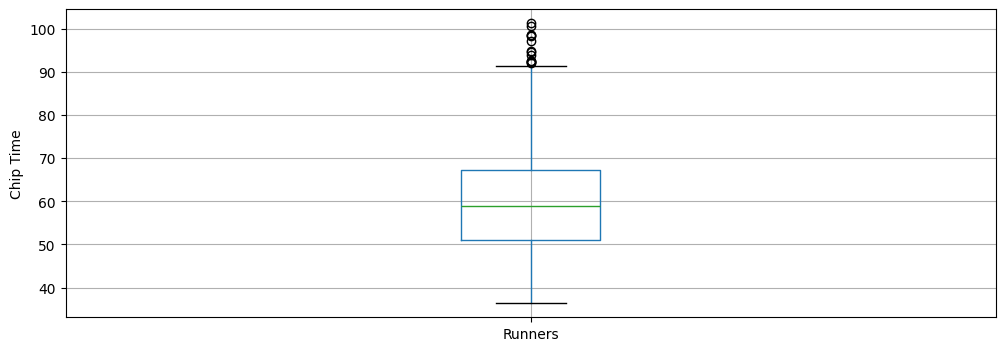

In [47]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

<ipython-input-52-69d9daa153b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


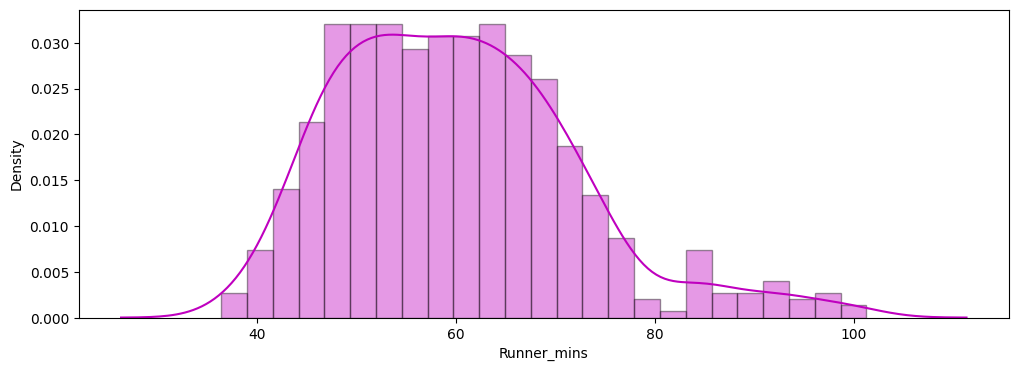

In [52]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

<ipython-input-53-c9cef76b4095>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
<ipython-input-53-c9cef76b4095>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_fuko, hist=False, kde=True, rug=Fal

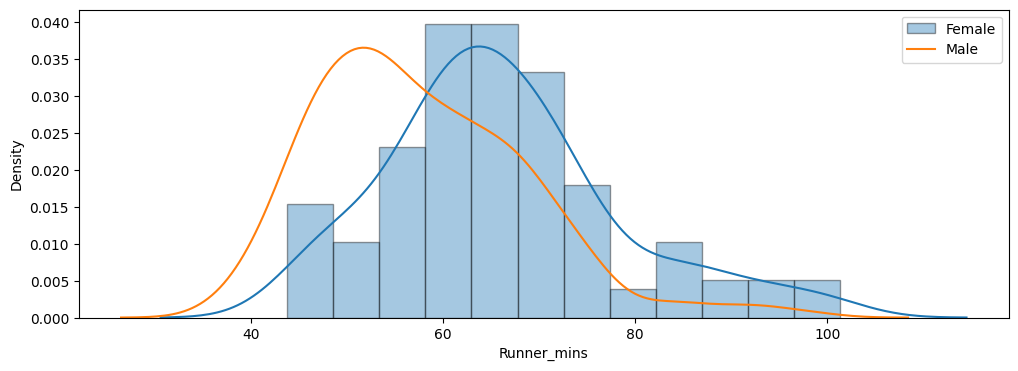

In [53]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [54]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
F             163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M             414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
F        72.058333  101.300000  
M        64.804167   98.516667  


Text(0.5, 0.98, '')

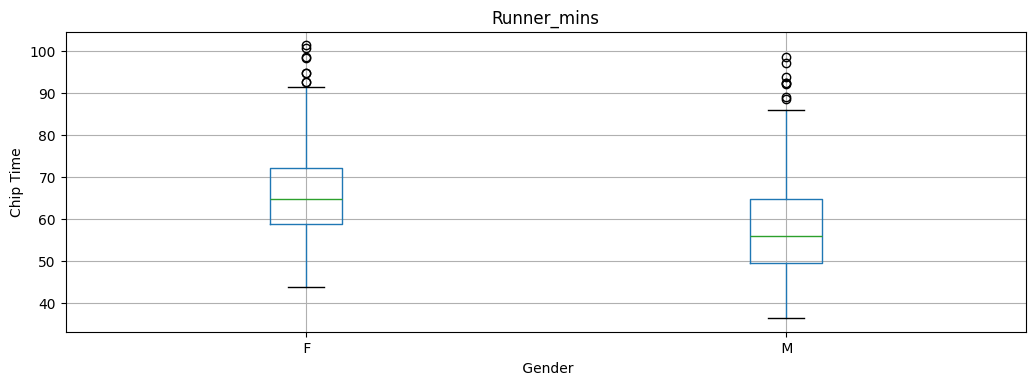

In [55]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")